# ¿A los Marcianos les gustan las hamburguesas?

## INDICE

1. INTRO
2. Limpieza(Extraer y Transformar)
3. Hipótesis 1 : "Cuando se estrenan BLOCKBUSTER de temática ci-fi, hay más avistamientos"
4. Hipótesis 2 : "En Año Nuevo hay más avistamientos"
5. Hipótesis 3: "Los avistamientos son un producto americano"
6. Conclusiones y TODO


1. INTRO

¿A los Marcianos les gustan las hamburguesas?, se trata de un estudio de un dataset, donde se recogen más de 100.000 avistamientos, desde el año 1.061, para obtener una serie de conclusiones al dar respuesta a las hipótesis planteadas.

2. Limpieza(Extraer y Transformar)

   Se ha procedido a limpiar y extraer registros de avistamientos mundiales UFO-UAP-OVNIs, recogidos en el dataset, presente en la web Data-World, en la siguiente url "https://data.world/khturner/national-ufo-reporting-center-reports", que a su vez lo obtiene scrapeando la siguiente web,'https://nuforc.org/'. Esta ultima es  web de la organizacion no gubernamental americana, NUFORC, o el National UFO Reporting Center, es una organización que recopila y archiva informes de avistamientos de OVNIs en los Estados Unidos y en otros lugares. Su objetivo es proporcionar un lugar donde las personas puedan informar sobre sus avistamientos de OVNIs y documentarlos para su análisis. La organización ha estado operativa durante décadas y ofrece un sitio web y una línea telefónica para que las personas envíen sus informes. NUFORC no confirma ni desacredita los informes, pero los archiva y los pone a disposición del público y los investigadores interesados en el fenómeno de los OVNIs.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns



In [2]:


df_ufo_nuforc = pd.read_csv('../data/mundo_nuforc_events.csv') # index_col = 0.............dataset sin limpiar de khturner...scrap de nuforc
df_ufo_nuforc

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cylinder,NaN,I video taped a UFO off the tv (cnn/headline n...,http://www.nuforc.org/webreports/032/S32416.html
110261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rule,TX,Unknown,15 minutes,Unusual sounds and starlight distortion defini...,http://www.nuforc.org/webreports/091/S91521.html
110262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subotica,NaN,NaN,NaN,Objects was moving very fast on this about pos...,http://www.nuforc.org/webreports/086/S86594.html
110263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Key West,FL,Other,one minute,I lived on a shallow-water marshland in Key We...,http://www.nuforc.org/webreports/034/S34436.html


In [3]:
df_ufo_nuforc.head(10)     


,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
5,2017-04-19T21:45:00Z,2017-04-19,2017.0,4.0,19.0,21.0,45.0,Cobourg (Canada),ON,Light,4 minutes,"Two ""satellites"" traving S in tandem, then re...",http://www.nuforc.org/webreports/133/S133715.html
6,2017-04-19T20:50:00Z,2017-04-19,2017.0,4.0,19.0,20.0,50.0,Garden City,SC,Sphere,20 seconds,Five bright orange orbs appear quietly over wa...,http://www.nuforc.org/webreports/133/S133718.html
7,2017-04-19T20:50:00Z,2017-04-19,2017.0,4.0,19.0,20.0,50.0,North Myrtle Beach,SC,Light,1 minute,Orange Orbs Spotted Over North Myrtle Beach......,http://www.nuforc.org/webreports/133/S133716.html
8,2017-04-19T20:30:00Z,2017-04-19,2017.0,4.0,19.0,20.0,30.0,Surfside Beach,SC,Circle,15 seconds,"Single orb over ocean, moved north, 5 orbs for...",http://www.nuforc.org/webreports/133/S133713.html
9,2017-04-19T20:10:00Z,2017-04-19,2017.0,4.0,19.0,20.0,10.0,Chiba City (Japan),NaN,Unknown,3 seconds,I saw a fast pretty round object from the othe...,http://www.nuforc.org/webreports/133/S133703.html


In [4]:
df_ufo_nuforc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110265 entries, 0 to 110264
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Time  108575 non-null  object 
 1   Event_Date  110012 non-null  object 
 2   Year        110012 non-null  float64
 3   Month       110012 non-null  float64
 4   Day         110163 non-null  float64
 5   Hour        108685 non-null  float64
 6   Minute      108677 non-null  float64
 7   City        110033 non-null  object 
 8   State       101961 non-null  object 
 9   Shape       106790 non-null  object 
 10  Duration    106103 non-null  object 
 11  Summary     110229 non-null  object 
 12  Event_URL   110265 non-null  object 
dtypes: float64(5), object(8)
memory usage: 10.9+ MB


Como tengo nan en columnas de Year, Month, Day, Hour y Minute, compruebo si tengo filas con esos nulos, y sin embargo su Event Time de la misma fila no nan, y como tiene toda la informacion esa columna en cuanto a fecha y hora, pues la utilizaria, pero como vemos no es asi

In [5]:
#Compruebo si puedo aprovechar la columna Event_Time, para rellenar Hour 
df_ufo_nuforc[df_ufo_nuforc['Hour'].isnull()  & df_ufo_nuforc['Event_Time'].notnull()]


,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL


In [6]:
#Compruebo si puedo aprovechar la columna Event_Time, para rellenar Minute
df_ufo_nuforc[df_ufo_nuforc['Minute'].isnull() & df_ufo_nuforc['Event_Time'].notnull()]

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL


In [7]:
#Compruebo si puedo aprovechar la columna Event_Time, para rellenar Year
df_ufo_nuforc[df_ufo_nuforc['Year'].isnull() & df_ufo_nuforc['Event_Time'].notnull()]

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL


In [8]:
#Compruebo si puedo aprovechar la columna Event_Time, para rellenar Month
df_ufo_nuforc[df_ufo_nuforc['Month'].isnull() & df_ufo_nuforc['Event_Time'].notnull()]

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL


In [9]:
#Compruebo si puedo aprovechar la columna Event_Time, para rellenar Day
df_ufo_nuforc[df_ufo_nuforc['Day'].isnull() & df_ufo_nuforc['Event_Time'].notnull()]

,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL


In [10]:
# eliminar filas con Nan en columna 'Event_Date', son pocas en el total del dataframe unas 2000 para un df de unos 110000
# df_ufo_nuforc = df_ufo_nuforc.dropna(subset=['Event_Date'])
# df_ufo_nuforc
# NO LO HAGO no quiero perder info de las fechas, en vez de ello relleno missing hour y minute con 0 y 0
df_ufo_nuforc['Hour'].fillna(0.0, inplace=True)
df_ufo_nuforc['Minute'].fillna(0.0, inplace=True)

In [11]:
df_ufo_nuforc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110265 entries, 0 to 110264
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Time  108575 non-null  object 
 1   Event_Date  110012 non-null  object 
 2   Year        110012 non-null  float64
 3   Month       110012 non-null  float64
 4   Day         110163 non-null  float64
 5   Hour        110265 non-null  float64
 6   Minute      110265 non-null  float64
 7   City        110033 non-null  object 
 8   State       101961 non-null  object 
 9   Shape       106790 non-null  object 
 10  Duration    106103 non-null  object 
 11  Summary     110229 non-null  object 
 12  Event_URL   110265 non-null  object 
dtypes: float64(5), object(8)
memory usage: 10.9+ MB


Limpiar filas por debajo año 1960, por tener baja ocurrencia,los años por debajo de este.

In [12]:
# limpiar filas por debajo año 1960, por tener baja ocurrencia

mask = df_ufo_nuforc['Year']<1961
df_ufo_nuforc = df_ufo_nuforc.drop(df_ufo_nuforc[mask].index)
df_ufo_nuforc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 109449 entries, 0 to 110264
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Time  107828 non-null  object 
 1   Event_Date  109196 non-null  object 
 2   Year        109196 non-null  float64
 3   Month       109196 non-null  float64
 4   Day         109347 non-null  float64
 5   Hour        109449 non-null  float64
 6   Minute      109449 non-null  float64
 7   City        109222 non-null  object 
 8   State       101225 non-null  object 
 9   Shape       106023 non-null  object 
 10  Duration    105342 non-null  object 
 11  Summary     109415 non-null  object 
 12  Event_URL   109449 non-null  object 
dtypes: float64(5), object(8)
memory usage: 11.7+ MB


Al tener todos los datos contemplados en event_time, en otras columnas de fecha y hora, la elimino, y pasamos de 13 columnas a 12.

In [13]:
# limpiar columnas event_time, info ya reflejada en date_time y su desglose
df_ufo_nuforc = df_ufo_nuforc.drop('Event_Time',axis=1)
df_ufo_nuforc 


,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...
110260,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Cylinder,NaN,I video taped a UFO off the tv (cnn/headline n...,http://www.nuforc.org/webreports/032/S32416.html
110261,NaN,NaN,NaN,NaN,0.0,0.0,Rule,TX,Unknown,15 minutes,Unusual sounds and starlight distortion defini...,http://www.nuforc.org/webreports/091/S91521.html
110262,NaN,NaN,NaN,NaN,0.0,0.0,Subotica,NaN,NaN,NaN,Objects was moving very fast on this about pos...,http://www.nuforc.org/webreports/086/S86594.html
110263,NaN,NaN,NaN,NaN,0.0,0.0,Key West,FL,Other,one minute,I lived on a shallow-water marshland in Key We...,http://www.nuforc.org/webreports/034/S34436.html


In [14]:
df_ufo_nuforc.info()
# ahora son 12 columnas

<class 'pandas.core.frame.DataFrame'>
Index: 109449 entries, 0 to 110264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Date  109196 non-null  object 
 1   Year        109196 non-null  float64
 2   Month       109196 non-null  float64
 3   Day         109347 non-null  float64
 4   Hour        109449 non-null  float64
 5   Minute      109449 non-null  float64
 6   City        109222 non-null  object 
 7   State       101225 non-null  object 
 8   Shape       106023 non-null  object 
 9   Duration    105342 non-null  object 
 10  Summary     109415 non-null  object 
 11  Event_URL   109449 non-null  object 
dtypes: float64(5), object(7)
memory usage: 10.9+ MB


Eliminar filas con Nan en columna 'Year' and 'Month', son pocas en el total del dataframe,y asi puedo forzar en el ssgte paso a convertir a int, ya que los nan,si no los cambio da error

In [15]:
# eliminar filas con Nan en columna 'Year' and 'Month', son pocas en el total del dataframe,
#   y asi puedo forzar en el ssgte paso a convertir a int, ya que los nan no los cambia da error
df_ufo_nuforc_1 = df_ufo_nuforc.dropna(subset=['Year','Month']).copy()
df_ufo_nuforc_1

,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...
109191,1961-03-01,1961.0,3.0,1.0,0.0,0.0,Bracknell (UK/England),NaN,Disk,?,I was born in Bracknell UK 1961. I had an exp...,http://www.nuforc.org/webreports/119/S119064.html
109192,1961-02-22,1961.0,2.0,22.0,20.0,0.0,Panhandle,TX,Diamond,~2 hours,Texas Panhandle Nuke site,http://www.nuforc.org/webreports/031/S31470.html
109193,1961-02-02,1961.0,2.0,2.0,1.0,0.0,Lancaster,CA,Disk,3 Min.,"Brilliant,silver disk. 50 to 55 degree angle o...",http://www.nuforc.org/webreports/005/S05742.html
109194,1961-01-01,1961.0,1.0,1.0,13.0,0.0,Kendallville,IN,Circle,30 seconds,It was a clear Indiana day and I saw something...,http://www.nuforc.org/webreports/058/S58389.html


In [16]:
df_ufo_nuforc_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109196 entries, 0 to 109195
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Event_Date  109196 non-null  object 
 1   Year        109196 non-null  float64
 2   Month       109196 non-null  float64
 3   Day         109196 non-null  float64
 4   Hour        109196 non-null  float64
 5   Minute      109196 non-null  float64
 6   City        108980 non-null  object 
 7   State       101025 non-null  object 
 8   Shape       105796 non-null  object 
 9   Duration    105134 non-null  object 
 10  Summary     109162 non-null  object 
 11  Event_URL   109196 non-null  object 
dtypes: float64(5), object(7)
memory usage: 10.8+ MB


In [17]:
df_ufo_nuforc_7 = df_ufo_nuforc_1.copy()
# convertimos las columnas siguientes a int
df_ufo_nuforc_7['Year'] = df_ufo_nuforc_7['Year'].astype(int)
df_ufo_nuforc_7['Month'] = df_ufo_nuforc_7['Month'].astype(int)
df_ufo_nuforc_7['Day'] = df_ufo_nuforc_7['Day'].astype(int)
df_ufo_nuforc_7['Hour'] = df_ufo_nuforc_7['Hour'].astype(int)
df_ufo_nuforc_7['Minute'] = df_ufo_nuforc_7['Minute'].astype(int)

df_ufo_nuforc_7

,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20,2017,4,20,14,15,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20,2017,4,20,4,56,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19,2017,4,19,23,55,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19,2017,4,19,23,50,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19,2017,4,19,23,29,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...
109191,1961-03-01,1961,3,1,0,0,Bracknell (UK/England),NaN,Disk,?,I was born in Bracknell UK 1961. I had an exp...,http://www.nuforc.org/webreports/119/S119064.html
109192,1961-02-22,1961,2,22,20,0,Panhandle,TX,Diamond,~2 hours,Texas Panhandle Nuke site,http://www.nuforc.org/webreports/031/S31470.html
109193,1961-02-02,1961,2,2,1,0,Lancaster,CA,Disk,3 Min.,"Brilliant,silver disk. 50 to 55 degree angle o...",http://www.nuforc.org/webreports/005/S05742.html
109194,1961-01-01,1961,1,1,13,0,Kendallville,IN,Circle,30 seconds,It was a clear Indiana day and I saw something...,http://www.nuforc.org/webreports/058/S58389.html


En esta info de abajo se puede ver que tengo 8171 filas sin estado, 109196 - 101025

In [18]:
df_ufo_nuforc_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109196 entries, 0 to 109195
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Event_Date  109196 non-null  object
 1   Year        109196 non-null  int32 
 2   Month       109196 non-null  int32 
 3   Day         109196 non-null  int32 
 4   Hour        109196 non-null  int32 
 5   Minute      109196 non-null  int32 
 6   City        108980 non-null  object
 7   State       101025 non-null  object
 8   Shape       105796 non-null  object
 9   Duration    105134 non-null  object
 10  Summary     109162 non-null  object
 11  Event_URL   109196 non-null  object
dtypes: int32(5), object(7)
memory usage: 8.7+ MB


Identificamos valores nan en columna State, pues cuando es asi, normalmente son ciudades fuera de USA, y vienen como Chiba City(Japan), por ejemplo, entonces quiero sacar el pais entre paréntesis, a la columna de State, y dejo solo la ciudad sin lo que hay en los parentesis. 

In [19]:
df_ufo_nuforc_3 = df_ufo_nuforc_7.copy()
mask = df_ufo_nuforc_3['State'].isna() # mascara booleana de los nan de la columna state

# Saca el contenido entre paréntesis en la columna 'City' y se lo asigna a la columna State que estaba en nan
df_ufo_nuforc_3.loc[mask, 'State'] = df_ufo_nuforc_3.loc[mask, 'City'].str.extract('\((.*?)\)', expand=False)#la expr busca coinc, expand 1 coinc sin df con todas

# Eliminar los paréntesis de la columna 'City' para que quede con el texto sin paréntesis
df_ufo_nuforc_3['City'] = df_ufo_nuforc_3['City'].str.replace('\(.*\)', '', regex=True) #la exp  regex en este metodo str dice q la exp es reg

In [20]:
df_ufo_nuforc_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109196 entries, 0 to 109195
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Event_Date  109196 non-null  object
 1   Year        109196 non-null  int32 
 2   Month       109196 non-null  int32 
 3   Day         109196 non-null  int32 
 4   Hour        109196 non-null  int32 
 5   Minute      109196 non-null  int32 
 6   City        108980 non-null  object
 7   State       108366 non-null  object
 8   Shape       105796 non-null  object
 9   Duration    105134 non-null  object
 10  Summary     109162 non-null  object
 11  Event_URL   109196 non-null  object
dtypes: int32(5), object(7)
memory usage: 8.7+ MB


In [21]:
df_ufo_nuforc_3.head(10)

,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20,2017,4,20,14,15,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20,2017,4,20,4,56,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19,2017,4,19,23,55,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19,2017,4,19,23,50,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19,2017,4,19,23,29,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
5,2017-04-19,2017,4,19,21,45,Cobourg,ON,Light,4 minutes,"Two ""satellites"" traving S in tandem, then re...",http://www.nuforc.org/webreports/133/S133715.html
6,2017-04-19,2017,4,19,20,50,Garden City,SC,Sphere,20 seconds,Five bright orange orbs appear quietly over wa...,http://www.nuforc.org/webreports/133/S133718.html
7,2017-04-19,2017,4,19,20,50,North Myrtle Beach,SC,Light,1 minute,Orange Orbs Spotted Over North Myrtle Beach......,http://www.nuforc.org/webreports/133/S133716.html
8,2017-04-19,2017,4,19,20,30,Surfside Beach,SC,Circle,15 seconds,"Single orb over ocean, moved north, 5 orbs for...",http://www.nuforc.org/webreports/133/S133713.html
9,2017-04-19,2017,4,19,20,10,Chiba City,Japan,Unknown,3 seconds,I saw a fast pretty round object from the othe...,http://www.nuforc.org/webreports/133/S133703.html


In [22]:
estados_fuera_parentesis = df_ufo_nuforc_3.copy()

Lineas que aun tienen State nan y tienen ciudad

In [23]:
estados_fuera_parentesis[estados_fuera_parentesis['State'].isnull() & estados_fuera_parentesis['City'].notnull()]
#lineas que aun tienen State nan y tienen ciudad

,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
94,2017-04-13,2017,4,13,16,30,Mckee,NaN,NaN,1 minute,Object seen twice moving low in Jackson County...,http://www.nuforc.org/webreports/133/S133616.html
197,2017-04-05,2017,4,5,23,0,Greater Atlanta- south,NaN,Other,10 minutes,Your rules for reporting are ridiculous. Most ...,http://www.nuforc.org/webreports/133/S133455.html
552,2017-03-02,2017,3,2,11,20,Burbank,NaN,Sphere,00:00:10,A silvery orb high up to the ENE. Appeared to...,http://www.nuforc.org/webreports/132/S132794.html
684,2017-02-20,2017,2,20,12,45,Hiwassee,NaN,Egg,15 seconds,Fast white hazy object larger than jet incredi...,http://www.nuforc.org/webreports/132/S132732.html
910,2017-02-05,2017,2,5,23,23,Puyallup,NaN,NaN,3-5 seconds,2 Bright Blue Flashes with sound.,http://www.nuforc.org/webreports/132/S132484.html
...,...,...,...,...,...,...,...,...,...,...,...,...
108774,1965-06-19,1965,6,19,0,0,Western Pacific,NaN,Unknown,1-2 minutes,high speed ufo spotted and tracked on U.S. Nav...,http://www.nuforc.org/webreports/043/S43396.html
108833,1965-04-01,1965,4,1,15,0,West Germany,NaN,Disk,8 sec.,"Saucer with lights, did not appear to be movin...",http://www.nuforc.org/webreports/056/S56836.html
109000,1963-06-30,1963,6,30,15,0,Canada,NaN,Triangle,less than 1 min,Silent black triangle flew over our car in 1963.,http://www.nuforc.org/webreports/107/S107526.html
109067,1962-09-15,1962,9,15,7,0,Puerto Rico,NaN,Disk,Hour and a Half,Spinning lights inside of a small boiling cloud.,http://www.nuforc.org/webreports/067/S67756.html


Elimino las filas que tengan state a nan

In [24]:
# elimino las filas que tengan state a nan
df_ufo_nuforc_4 = estados_fuera_parentesis.dropna(subset=['State'])
df_ufo_nuforc_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108366 entries, 0 to 109195
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Event_Date  108366 non-null  object
 1   Year        108366 non-null  int32 
 2   Month       108366 non-null  int32 
 3   Day         108366 non-null  int32 
 4   Hour        108366 non-null  int32 
 5   Minute      108366 non-null  int32 
 6   City        108265 non-null  object
 7   State       108366 non-null  object
 8   Shape       105111 non-null  object
 9   Duration    104451 non-null  object
 10  Summary     108332 non-null  object
 11  Event_URL   108366 non-null  object
dtypes: int32(5), object(7)
memory usage: 8.7+ MB


Las shape, duracion de avistamiento, están con nan que no corrijo porque no son asunto de este estudio, y ciudades( estan desfasadas unas 99 con nan), que ahora corregire.

In [25]:
# relleno las ciudades nan con '', para no perder fecha ni estado, son pocas 99 lineas q mantengo
df_ufo_nuforc_7 =df_ufo_nuforc_4.copy()
df_ufo_nuforc_7['City'].fillna('', inplace=True)
df_ufo_nuforc_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108366 entries, 0 to 109195
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Event_Date  108366 non-null  object
 1   Year        108366 non-null  int32 
 2   Month       108366 non-null  int32 
 3   Day         108366 non-null  int32 
 4   Hour        108366 non-null  int32 
 5   Minute      108366 non-null  int32 
 6   City        108366 non-null  object
 7   State       108366 non-null  object
 8   Shape       105111 non-null  object
 9   Duration    104451 non-null  object
 10  Summary     108332 non-null  object
 11  Event_URL   108366 non-null  object
dtypes: int32(5), object(7)
memory usage: 8.7+ MB


Reduzco el dataframe, con los años de 1999 a 2017, para tenerlo mas manejable, y siendo parte mas relevante del estudio

In [26]:
# HACIENDO MAS PEQUEÑO EL DATAFRAME
mask = df_ufo_nuforc_7['Year']<1999
nuforc_99_17 = df_ufo_nuforc_7.drop(df_ufo_nuforc_7[mask].index)
nuforc_99_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94011 entries, 0 to 94682
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Date  94011 non-null  object
 1   Year        94011 non-null  int32 
 2   Month       94011 non-null  int32 
 3   Day         94011 non-null  int32 
 4   Hour        94011 non-null  int32 
 5   Minute      94011 non-null  int32 
 6   City        94011 non-null  object
 7   State       94011 non-null  object
 8   Shape       92223 non-null  object
 9   Duration    90855 non-null  object
 10  Summary     93992 non-null  object
 11  Event_URL   94011 non-null  object
dtypes: int32(5), object(7)
memory usage: 7.5+ MB


In [27]:
nuforc_99_17


,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20,2017,4,20,14,15,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20,2017,4,20,4,56,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19,2017,4,19,23,55,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19,2017,4,19,23,50,Newton,AL,Triangle,5-6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19,2017,4,19,23,29,Denver,CO,Light,1 hour,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html
...,...,...,...,...,...,...,...,...,...,...,...,...
94678,1999-01-01,1999,1,1,14,0,Florence,SC,Cylinder,10 min.,It was a clear day when I saw a silver cylin...,http://www.nuforc.org/webreports/030/S30662.html
94679,1999-01-01,1999,1,1,3,54,Auckland,New Zealand,Disk,5 minutes,"me and my sister witness ufo in a field, we go...",http://www.nuforc.org/webreports/013/S13413.html
94680,1999-01-01,1999,1,1,3,0,Bauxite,AR,NaN,2 minutes,Close encounter,http://www.nuforc.org/webreports/079/S79722.html
94681,1999-01-01,1999,1,1,2,30,Loma Rica,CA,Light,10-20minutes,Lights I saw and now seem to feel.,http://www.nuforc.org/webreports/043/S43863.html


Iba a quitar duplicados en fecha y ciudad, pero vi que podían ocurrir en otras horas, y no queria perder posibles avistamientos notificados, por distintas personas, y diferentes horas.

In [28]:
# pd.set_option('display.max_rows', 500)

# nuforc_10_17_1 = nuforc_10_17.drop_duplicates(subset=['Event_Date', 'City'])'''lo que ocurra en el mismo dia y en el mismo lugar, 
#                                                                             se pierden horas diferentes NO LO HAGO'''
# nuforc_10_17_1

3. Hipótesis 1 : "Cuando se estrenan BLOCKBUSTER de temática ci-fi, hay más avistamientos"
    Para demostrar esta hipótesis, voy a ver por fechas diarias los avistamientos que han ocurrido, en el año de estreno de blockbuster, y luego los voy a mensualizar, para ver si el mes o posterior hay mas avistamientos en comparacion con el resto del año, para ello obtengo grafica de cada pelicula

In [29]:
# ESTRENO STAR TREK TV 8/9/1966 TELEVISION
df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1966
df_1966 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1966]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_66 = df_1966['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_66 = avistamientos_por_fecha_66.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos_66 = avistamientos_por_fecha_66.head(20)
print(top_fechas_avistamientos_66)

Event_Date
1966-06-01    26
1966-06-15    19
1966-06-30    18
1966-07-01     8
1966-09-15     8
1966-07-15     7
1966-03-15     6
1966-10-15     6
1966-11-01     5
1966-10-01     5
1966-05-15     4
1966-08-15     4
1966-04-01     4
1966-05-01     3
1966-08-01     3
1966-06-06     3
1966-06-25     3
1966-06-12     3
1966-12-15     3
1966-04-15     3
Name: count, dtype: int64


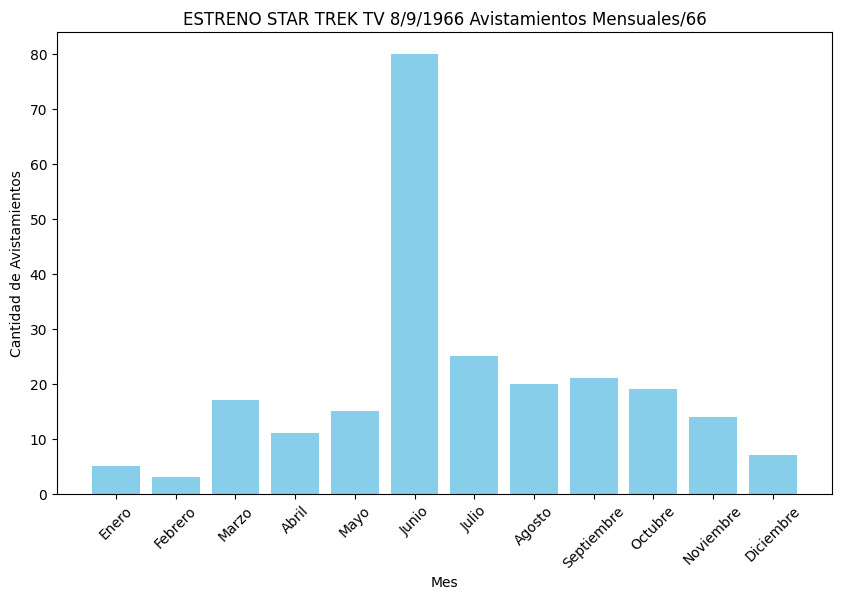

In [30]:

# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_66 = df_1966.groupby(df_1966['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_66 = avistamientos_por_mes_66.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_66, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('ESTRENO STAR TREK TV 8/9/1966 Avistamientos Mensuales/66')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

No vemos que en el estreno de STAR TREK(la serie), en el 8/9/66, haya un incremento de avistamientos reseñable.

In [31]:
# STAR WARS IV Estreno 25/5/77

df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1977
df_1977 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1977]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_77 = df_1977['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_77 = avistamientos_por_fecha_77.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos_77 = avistamientos_por_fecha_77.head(20)
print(top_fechas_avistamientos_77)

Event_Date
1977-06-01    24
1977-06-15    24
1977-07-15    18
1977-09-01    11
1977-05-01    10
1977-06-30     9
1977-07-01     9
1977-09-15     8
1977-08-15     8
1977-08-01     7
1977-01-01     5
1977-06-10     5
1977-07-20     4
1977-05-15     4
1977-08-08     4
1977-07-26     4
1977-07-02     4
1977-07-04     4
1977-04-15     4
1977-10-15     4
Name: count, dtype: int64


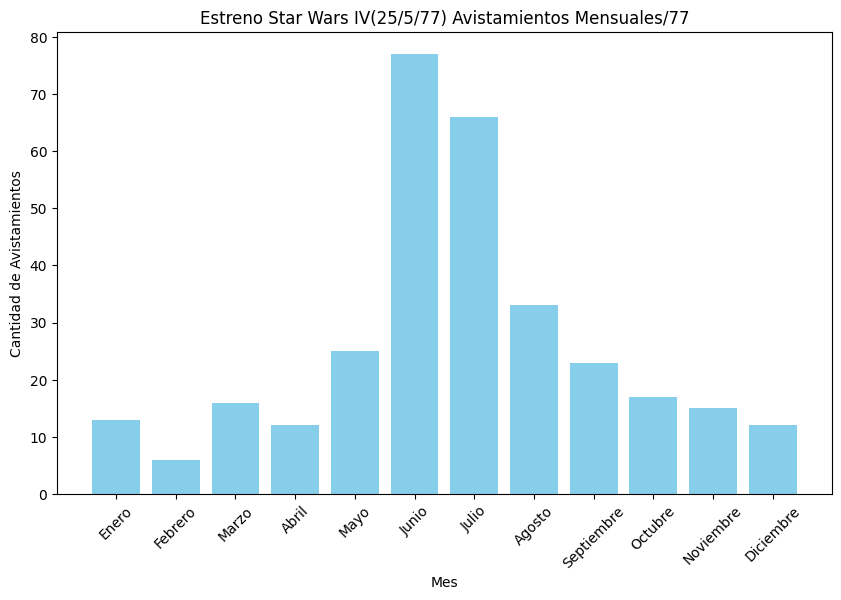

In [32]:


# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_77 = df_1977.groupby(df_1977['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_77 = avistamientos_por_mes_77.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_77, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('Estreno Star Wars IV(25/5/77) Avistamientos Mensuales/77')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

Vemos que en el estreno de STAR WARS , en el 25/5/77 , hay un incremento de avistamientos en fechas posteriores, concretamente en el mes de Junio, ya que el estreno fue a final de Mayo, podriamos tener en cuenta este aumento causado por el estreno.

In [33]:
# Encuentros en la III fase Estreno 17/3/78

df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1978
df_1978 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1978]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_78 = df_1978['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_78 = avistamientos_por_fecha_78.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos = avistamientos_por_fecha_78.head(20)
print(top_fechas_avistamientos)



Event_Date
1978-06-01    30
1978-06-15    22
1978-06-30    21
1978-08-15    20
1978-07-01    19
1978-07-15    16
1978-10-15     9
1978-08-01     9
1978-09-15     9
1978-07-04     9
1978-09-01     6
1978-07-20     6
1978-11-01     5
1978-01-01     5
1978-07-26     5
1978-04-04     4
1978-02-15     4
1978-07-07     4
1978-07-22     4
1978-10-12     3
Name: count, dtype: int64


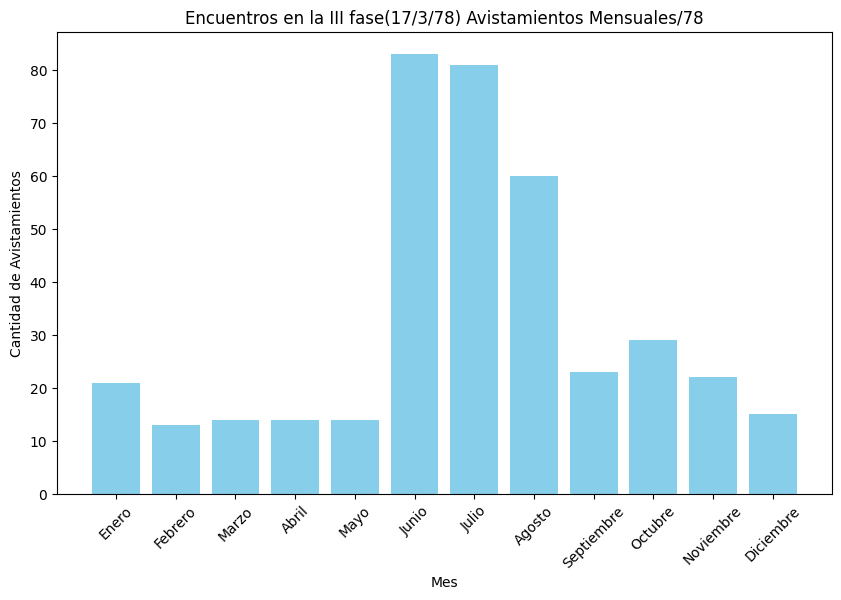

In [34]:


# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_78 = df_1978.groupby(df_1978['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_78 = avistamientos_por_mes_78.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_78, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('Encuentros en la III fase(17/3/78) Avistamientos Mensuales/78')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

No vemos que en el estreno de Encuentros en la III fase, en el 17/3/78, haya un incremento de avistamientos reseñable.

In [35]:
# STAR TREK Estreno EN CINE 7/12/79

df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1979
df_1979 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1979]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_79 = df_1979['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_79 = avistamientos_por_fecha_79.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos_79 = avistamientos_por_fecha_79.head(20)
print(top_fechas_avistamientos_79)

Event_Date
1979-06-01    31
1979-07-15    17
1979-06-15    17
1979-09-01    12
1979-06-30    12
1979-07-01    11
1979-08-15     9
1979-08-01     8
1979-10-01     8
1979-05-15     6
1979-04-15     5
1979-01-01     4
1979-06-20     4
1979-10-10     4
1979-01-15     3
1979-11-10     3
1979-04-01     3
1979-11-15     3
1979-09-15     3
1979-11-01     3
Name: count, dtype: int64


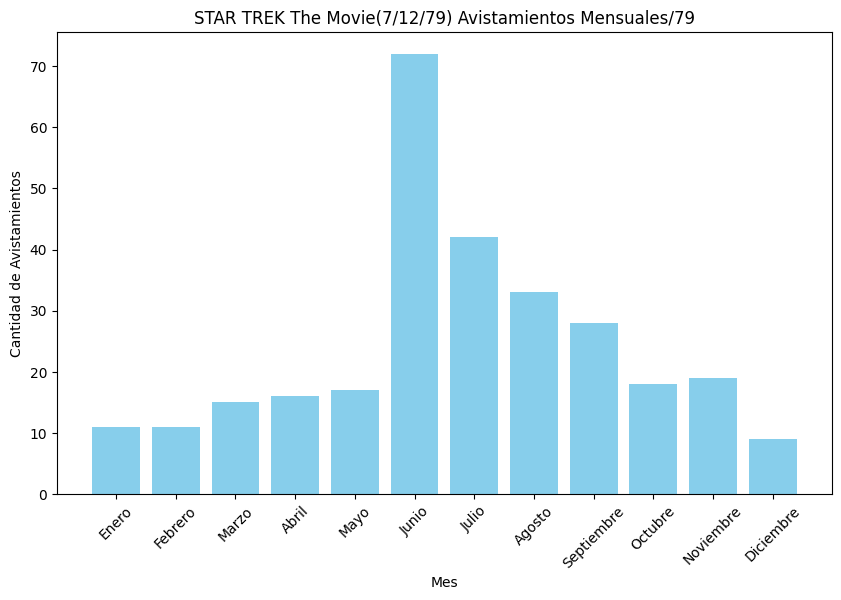

In [36]:


# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_79 = df_1979.groupby(df_1979['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_79 = avistamientos_por_mes_79.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_79, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('STAR TREK The Movie(7/12/79) Avistamientos Mensuales/79')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

No vemos que en el estreno de Star Trek, en el 7/12/79, haya un incremento de avistamientos reseñable.

In [37]:
# INDEPENDENCE DAY 6/7/1996 Estreno EN CINE 

df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1996
df_1996 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1996]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_96 = df_1996['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_96 = avistamientos_por_fecha_96.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos_96 = avistamientos_por_fecha_96.head(20)
print(top_fechas_avistamientos_96)

Event_Date
1996-06-01    37
1996-06-15    30
1996-08-15    20
1996-08-01    18
1996-07-15    17
1996-11-16    17
1996-07-01    16
1996-04-15    14
1996-12-17    13
1996-06-30    12
1996-09-15    12
1996-04-14    11
1996-04-01    10
1996-09-01    10
1996-02-09    10
1996-06-20    10
1996-05-01     9
1996-03-01     9
1996-06-12     8
1996-11-30     8
Name: count, dtype: int64


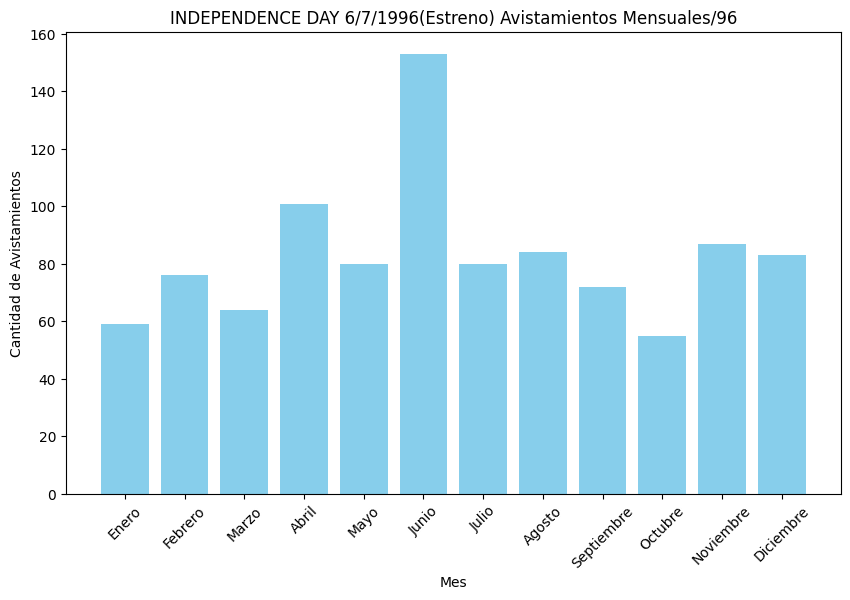

In [38]:


# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_96 = df_1996.groupby(df_1996['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_96 = avistamientos_por_mes_96.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_96, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('INDEPENDENCE DAY 6/7/1996(Estreno) Avistamientos Mensuales/96')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

No vemos que en el estreno de Independence Day, en el 6/7/1996, haya un incremento de avistamientos reseñable.

In [39]:
# STAR WARS EPISODIO I AMENAZA FANTASMA 19/5/1999 Estreno EN CINE 

df_ufo_nuforc_7['Event_Date'] = pd.to_datetime(df_ufo_nuforc_7['Event_Date'])#convertimos a objeto datetime

# Filtra los registros para el año 1996
df_1999 = df_ufo_nuforc_7[df_ufo_nuforc_7['Event_Date'].dt.year == 1999]

# Cuenta los avistamientos para cada día
avistamientos_por_fecha_99 = df_1999['Event_Date'].dt.date.value_counts()

# Ordena los resultados por la cantidad de avistamientos en orden descendente
avistamientos_por_fecha_99 = avistamientos_por_fecha_99.sort_values(ascending=False)

# Muestra las fechas con la mayor cantidad de avistamientos (por ejemplo, las 20 primeras)
top_fechas_avistamientos_99 = avistamientos_por_fecha_99.head(20)
print(top_fechas_avistamientos_99)

Event_Date
1999-11-16    195
1999-09-01     70
1999-08-15     54
1999-06-01     49
1999-06-15     35
1999-10-15     31
1999-09-07     30
1999-09-11     29
1999-07-01     24
1999-09-15     23
1999-07-15     22
1999-08-12     22
1999-10-26     22
1999-08-01     21
1999-12-26     19
1999-09-05     19
1999-10-11     19
1999-03-04     19
1999-07-04     18
1999-07-18     17
Name: count, dtype: int64


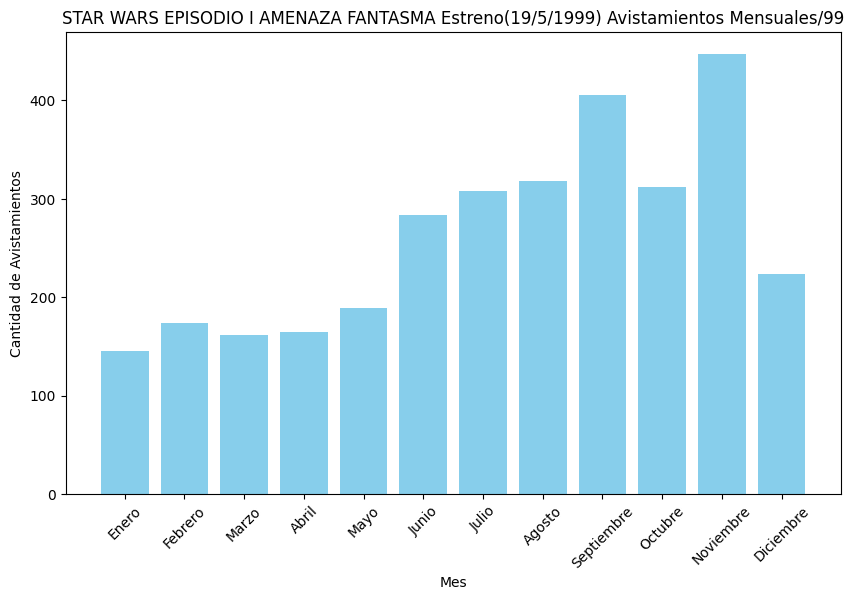

In [40]:
# Agrupa los avistamientos por mes y suma la cantidad
avistamientos_por_mes_99 = df_1999.groupby(df_1999['Event_Date'].dt.month)['Event_Date'].count()

# Ordena los resultados por mes
avistamientos_por_mes_99 = avistamientos_por_mes_99.sort_index()

# Crea el gráfico de barras
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.figure(figsize=(10, 6))
plt.bar(meses, avistamientos_por_mes_99, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Avistamientos')
plt.title('STAR WARS EPISODIO I AMENAZA FANTASMA Estreno(19/5/1999) Avistamientos Mensuales/99')

# Muestra el gráfico de barras
plt.xticks(rotation=45)
plt.show()

Vemos que en el estreno de Star War, en el 19/5/99, hay un incremento de avistamientos reseñable, en los meses posteriores al estreno, pudiendo tener causa el incremento en el estreno de la película.

En cuanto a esta hipótesis, despues de haber estudiado 6 casos, salvo los dos de la saga STAR WARS, que tienen incremento en los meses posteriores, que coincide este con Junio, los demás casos no se observa tal incremento. Pero en todos, incluso en el de STAR WARS hay un incremento en JUNIO, por lo que no se refrenda la hipótesis, ni siquiera en el caso de STAR WARS, y si que Junio es un mes donde hay muchos avistamientos, de los que mas en el año.


4. Hipótesis 2 : "En Año Nuevo hay más avistamientos"

   HIPOTESIS FECHAS ESPECIALES


In [41]:

# HIPOTESIS CONCENTRACION EN FECHAS ESPECIALES
#por años


nuforc_99_17['Event_Date'] = pd.to_datetime(nuforc_99_17['Event_Date'])#convertimos a objeto datetime

# Utiliza el método "value_counts" para contar las ocurrencias de cada fecha
date_counts = nuforc_99_17['Event_Date'].value_counts()

# Ordena las fechas por la cantidad de ocurrencias en orden descendente
date_counts = date_counts.sort_values(ascending=False)

# Muestra las fechas que más se repiten
print(date_counts.head(20))

Event_Date
2015-11-07    289
2014-07-04    268
2010-07-04    210
1999-11-16    195
2012-07-04    194
2013-07-04    183
2015-07-04    177
2011-07-04    158
2009-09-19    129
2016-07-27    104
2014-01-01    103
2013-12-31     98
2014-07-05     98
2004-10-31     94
2009-07-04     87
2013-07-06     82
2014-07-12     77
2012-01-01     77
2015-09-27     76
2013-01-01     74
Name: count, dtype: int64


En el resultado sobre estas líneas vemos, que aunque son fechas de cada año, vemos que repiten en los top 20, 31 de Diciembre, y 1 de Enero, o sea Fin de Año y Año nuevo. Pero además y con mas fuerza salen varios 4 de Julio, dia de la Independencia, dia de la nacion americana.

En el siguiente codigo ya lo que busco es dentro de la serie de 1999 a 2017, es que fecha tiene mas avistamientos, independientemente del año.

In [42]:



# Crea una nueva columna "DiaMes" que contenga el día y el mes sin tener en cuenta el año
nuforc_99_17['MesDia'] = nuforc_99_17['Event_Date'].dt.strftime('%m-%d')

# Utiliza el método "value_counts" para contar las ocurrencias de cada "DiaMes"
ocurrencias_por_dia_mes = nuforc_99_17['MesDia'].value_counts()

# Ordena las ocurrencias en orden descendente
ocurrencias_por_dia_mes = ocurrencias_por_dia_mes.sort_values(ascending=False)

# Muestra las ocurrencias por día y mes
print(ocurrencias_por_dia_mes)

MesDia
07-04    1645
01-01     762
11-07     541
08-15     539
12-31     532
         ... 
03-24     159
03-26     158
05-16     157
12-19     155
02-29      61
Name: count, Length: 366, dtype: int64


Y como hemos adelantado antes, sale con mucha fuerza el dia nacional americano(4 de Julio)(1645 avistamientos), doblando al siguiente(segundo) que es el 1 de Enero(762 avistamientos), y estando en muy cerca el 31 de diciembre en 5 lugar con 532 avistamientos

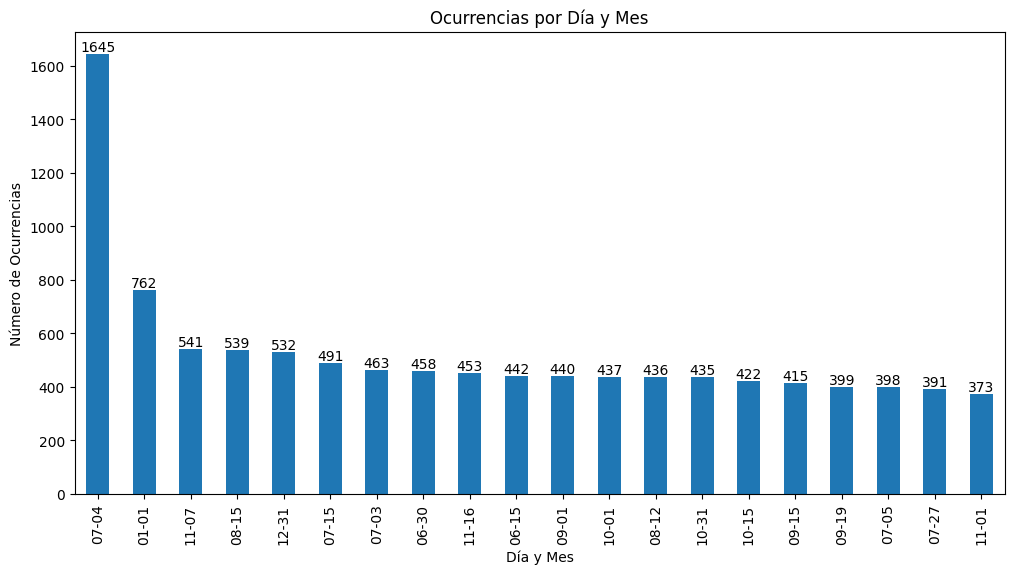

In [43]:

top_ocurrencias = ocurrencias_por_dia_mes.head(20)
plt.figure(figsize=(12, 6))
top_ocurrencias.plot(kind='bar')
plt.title('Ocurrencias por Día y Mes')
plt.xlabel('Día y Mes')
plt.ylabel('Número de Ocurrencias')
for x, y in enumerate(top_ocurrencias):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()

Por lo tanto podemos decir que tanto datos, como la grafica, no solo sostienen la hipotesis de que en Año Nuevo, hay mas avistamientos, si no que ademas,es superada por el 4 de Julio, o sea que como subhipótesis corroborada seria que en los días de fiesta se ven mas OVNIsssss.

He añadido el estudio por horas, que a continuacion dejo, en este apartado de fechas especiales.

In [44]:
# Copia del DataFrame original
nuforc_data = nuforc_99_17.copy()

# Cuenta los avistamientos en cada hora del día
avistamientos_por_hora = nuforc_data['Hour'].value_counts().sort_index()

print(avistamientos_por_hora)
'''OJO ESAS HORAS SON ZULU,  y usa es mas del 90 por ciento de los avistamientos
por lo q esas observaciones se deslizarian hacia atras entre 6 horas de media'''

Hour
0      5743
1      3562
2      2458
3      2259
4      1845
5      1965
6      1530
7      1137
8       990
9      1179
10     1343
11     1368
12     1497
13     1398
14     1405
15     1519
16     1809
17     2877
18     4861
19     7235
20    10233
21    13710
22    12824
23     9264
Name: count, dtype: int64


'OJO ESAS HORAS SON ZULU,  y usa es mas del 90 por ciento de los avistamientos\npor lo q esas observaciones se deslizarian hacia atras entre 6 horas de media'

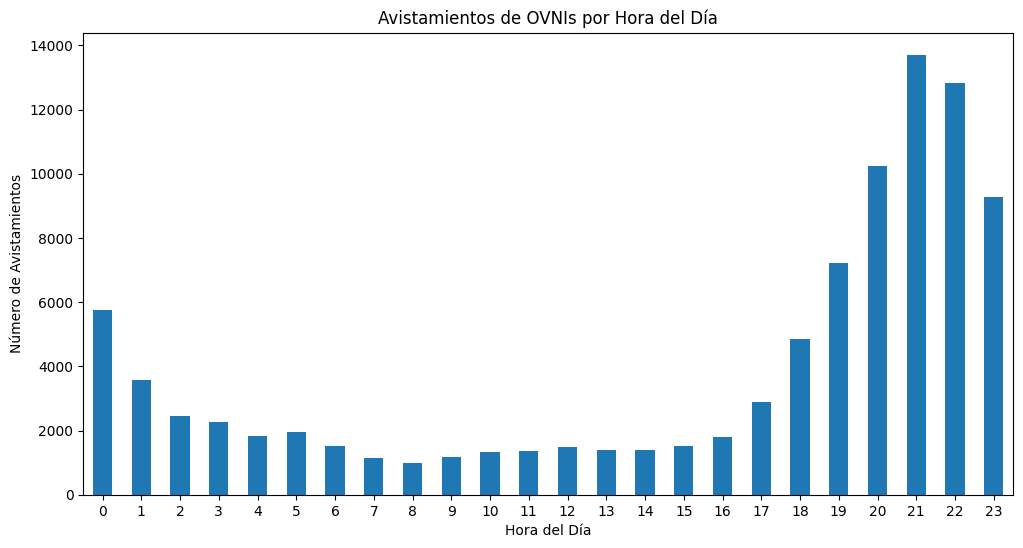

In [45]:
# Crea un gráfico de barras para mostrar los avistamientos por hora
avistamientos_por_hora.plot(kind='bar', figsize=(12, 6))

# Personaliza el gráfico
plt.title("Avistamientos de OVNIs por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Avistamientos")
plt.xticks(rotation=0)  # No rotar las etiquetas del eje X

# Muestra el gráfico
plt.show()

5. Hipótesis 3: "Los avistamientos son un producto americano"

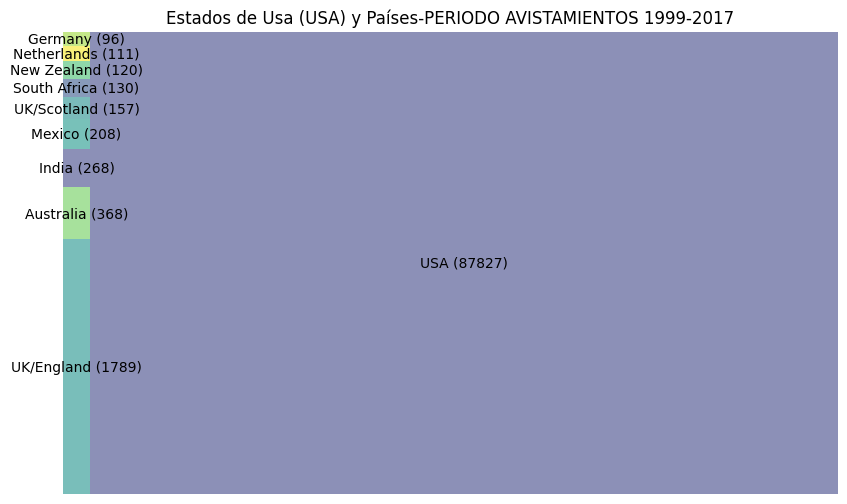

In [49]:

# columna 'State' que contiene los estados(USA) y otros países

# Filtra los estados estadounidenses (2 caracteres)
estados_usa = nuforc_99_17[nuforc_99_17['State'].str.len() == 2]['State']

# Cuenta la cantidad de ocurrencias de cada estado estadounidense
conteo_estados_usa = estados_usa.value_counts()

# Filtra los estados y otros países (que no son de 2 caracteres)
estados_paises = nuforc_99_17[nuforc_99_17['State'].str.len() != 2]['State']

# Cuenta la cantidad de ocurrencias de estados y países (excluyendo los de 2 caracteres)
conteo_paises = estados_paises.value_counts()
# Excluye los países con menos de 80 ocurrencias
conteo_paises = conteo_paises[conteo_paises > 80]

# Combina los datos en un solo DataFrame
# conteo_total = pd.concat([conteo_estados_usa, conteo_estados_paises], axis=0)
conteo_paises['USA'] = conteo_estados_usa.sum()


# Crea una lista de etiquetas con el formato "Nombre del Estado (Cantidad)"
etiquetas = [f'{estado} ({ocurrencias})' for estado, ocurrencias in conteo_paises.items()]

# Crea una gráfica squarify
plt.figure(figsize=(10, 6))
squarify.plot(sizes=conteo_paises, label=etiquetas, alpha=0.6)#label=si no conteo_paises.index
plt.axis('off')
plt.title('Estados de Usa (USA) y Países-PERIODO AVISTAMIENTOS 1999-2017')
plt.show()


El gráfico de arriba muestra la potencia mundial que es USA, en avistamientos, en el periodo de 1999 a 2017, de los 94011 sucesos, alli se vieron la friolera de 87827, mas de un 93 %. Si no son los avistamientos un producto nacional americano, es que a los marcianos les gustan las hamburguesas.

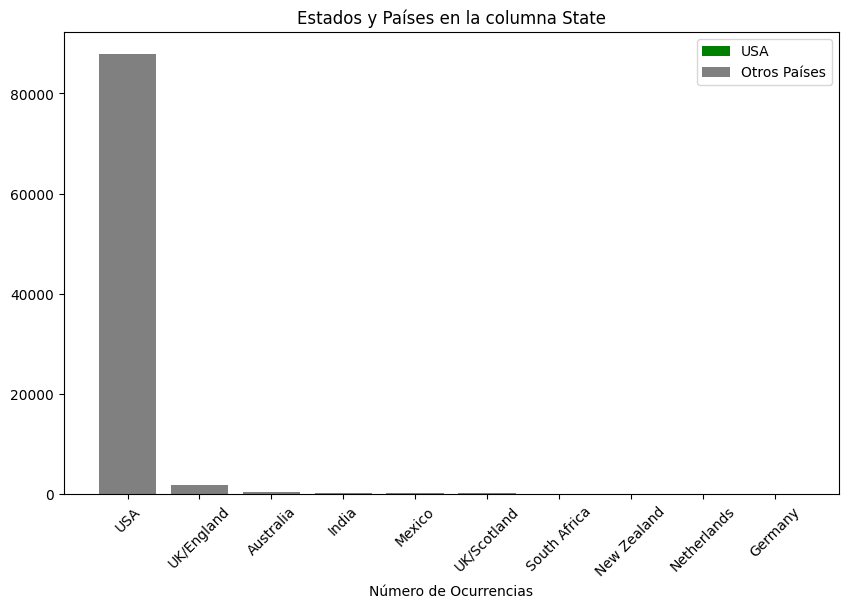

In [47]:
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.bar('USA', conteo_paises['USA'], color='green', label='USA')
plt.bar(conteo_paises.index, conteo_paises.values, color='gray', label='Otros Países')
plt.xlabel('Número de Ocurrencias')
plt.title('Estados y Países en la columna State')
plt.xticks(rotation=45)
plt.legend()
plt.show()
# NO SALE AZUL

El gráfico sobre estas lineas sigue corroborando lo poco que se ven fenomenos aereos no identificados en otros países, que no sea USA.

6. Conclusiones y TODO

Según todo lo visto y comentado, las películas no inducen a ver Ovnis, las fiestas si influyen, y USA mandan en los avistamientos, puede ser tambien porque la base de datos de este estudio es americana de una organizacion americana, y les es más fácil reportar a los americanos que a un señor de Yibuti. Mi opinión y en base a estos datos es que los marcianos son un producto americano.

TO DO
Se podría entre otras cosas, escrapear la web para sacar mas datos actuales, ya que la organización los tiene totalmente actualizados a fecha actual, y ver correlación entre las últimas noticias, del Pentagono, y su personal, en el incremento de los avistamientos.

